In [1]:
# approach is from this website: 
# https://www.pluralsight.com/guides/explore-python-libraries:-imbalanced-learn
# BalancedRandomForestClassifier differs from SMOTE and ADASYN in that it is 
# not a resampling method, but rather a classifier in which the training employs 
# resampling internally. For more info, see Breinman et al., 
# Using Random Forest to Learn Imbalanced Data.

In [2]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# os.getcwd()

In [4]:
# os.listdir(os.getcwd())

In [5]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\all_param.csv")
all_param_df.shape


(39624, 351)

In [6]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [7]:
y_class

0        0
1        0
2        0
3        0
4        0
        ..
39619    1
39620    1
39621    1
39622    1
39623    1
Name: suc_class, Length: 39624, dtype: int64

In [79]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers','positive', 'negative', 'totaltags']  , axis=1)

In [80]:
x_data.columns

Index(['maxprice', 'maxdiscount', 'tagstrategy', 'tagaction', 'tagadventure',
       'tagdesignillustration', 'tagutilities', 'tagfreetoplay', 'tagrpg',
       'tagmassivelymultiplayer',
       ...
       'tagphilisophical', 'taggaming', 'tagfaith', 'tagmysterydungeon',
       'tagfeaturefilm', 'tagsteammachine', 'tagclicker', 'taghardware',
       'tag360video', 'tagvronly'],
      dtype='object', length=343)

In [81]:
x_data.shape

(39624, 343)

In [82]:
# Instantiate the classifier

from imblearn.ensemble import BalancedRandomForestClassifier

brf1 = BalancedRandomForestClassifier(n_estimators=100, random_state=0)

In [83]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, test_size=0.2, random_state=5)

In [84]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [85]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

# from sklearn.preprocessing import MinMaxScaler
# x_scaler = MinMaxScaler().fit(X_train)

In [86]:
# apply the trained scales (MinMax) to the training and testing data

# X_train_scaled = x_scaler.transform(X_train)
# X_test_scaled = x_scaler.transform(X_test)

In [87]:
# Instantiate and Train model
y = y_train
X = X_train

brf1.fit(X_train, y_train)
y_pred = brf1.predict(X_test)

In [88]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {brf1.score(X_train, y_train)}")
print(f"Testing Data Score: {brf1.score(X_test, y_test)}")

Training Data Score: 0.8613836398624563
Testing Data Score: 0.8528706624605679


In [89]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = brf1.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      7764
           1       0.11      0.89      0.20       161

    accuracy                           0.85      7925
   macro avg       0.55      0.87      0.56      7925
weighted avg       0.98      0.85      0.90      7925



In [90]:
# thinking about baseline results:
# Support is not balanced - ~7700 of 1's and  160 0's
# Percision: for no success: 100%, better for successful games: 20%
# Percision= % of labeling an outcome that is correct from all the labels of that outcome
# labeled cancer correctly from all labeled cancer
# Recall: Fraction of positives found, 92% for 0, 93% for 1
# Recall - % of true label found from all true cases of the label
# how many of the cancer cases did you find
# f1 score: 92% due to overfitting on failure cases

<AxesSubplot:>

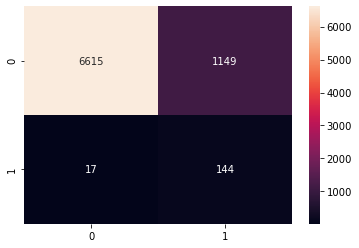

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = brf1.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [92]:
# Random Forests calculate feature importance
importances = brf1.feature_importances_
importances

array([7.44418282e-02, 2.67132194e-02, 3.79028663e-02, 5.39589674e-02,
       4.77202715e-02, 1.73949118e-04, 6.10166406e-04, 1.01973514e-02,
       2.97523984e-02, 7.30238933e-03, 4.53808003e-02, 1.23566980e-02,
       1.63907263e-02, 1.99554953e-02, 5.27597955e-03, 3.78118487e-03,
       9.64378177e-05, 1.36494691e-04, 2.31605388e-04, 4.42601135e-04,
       8.93836329e-04, 8.18158098e-05, 8.24840079e-07, 5.08190564e-04,
       1.48031180e-03, 4.52387522e-03, 5.51647809e-04, 2.55312451e-03,
       8.22889774e-04, 1.31746218e-03, 2.29078501e-03, 3.15422923e-04,
       2.34727379e-04, 1.70561533e-04, 1.89121996e-03, 1.49898140e-03,
       9.75080599e-03, 1.14303912e-02, 5.63586098e-03, 2.02031443e-04,
       1.22511786e-03, 5.87647992e-03, 1.99876983e-03, 4.00435247e-04,
       3.35336061e-04, 1.14457917e-03, 3.08634167e-05, 4.37800178e-03,
       4.28010223e-03, 1.65481722e-03, 4.37478747e-04, 1.50613750e-04,
       2.03545827e-04, 5.85554702e-03, 2.07744236e-02, 2.66239246e-03,
      

In [93]:
# evaluate feature importance from X parameters
features_df = pd.DataFrame(zip(x_data.columns, brf1.feature_importances_))
# sort by feature importance 
features_df = features_df.sort_values(by=[1], ascending=False)
# features_df



In [94]:
# drop all variables less than 0.02 feature importance
x_filtered_df = features_df[features_df[1]>=0.01]
x_filtered_df

,0,1
105,tagmultiplayer,0.075420
0,maxprice,0.074442
138,tagsingleplayer,0.063679
3,tagaction,0.053959
4,tagadventure,0.047720
10,tagindie,0.045381
2,tagstrategy,0.037903
8,tagrpg,0.029752
1,maxdiscount,0.026713
54,tagcoop,0.020774
